# (Visualizing FordGoBike Data)
## by (Christine Magdy Ghobrial)

## Investigation Overview

> In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors , how user type, time, gender, and age impacts usage of the system.
## Dataset Overview

> Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Ford GoBike,consists of a fleet of specially designed,The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available in any time and riders have access to all bikes in the network when they become a member or purchase a pass.
Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/LENOVO/Downloads/201902-fordgobike-tripdata.csv')
# change the data type for start and end time to be datetime64 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
# dt.strftime() function to convert the dates in the given series object to the specified date format
# Directive %a -->> is Meaning Weekday as locale’s abbreviated name..

df['start_time_weekday'] = df['start_time'].dt.strftime('%a')
# Start and end time in hours -->> dt. hour attribute return a numpy array containing the hour .
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour
# to convert seconds to minutes 
df['duration_minute'] = df['duration_sec']/60
# we will calculate riders age from 'member_birth_year'
df['member_age'] = 2020 - df['member_birth_year']
# that query help to select the attribute without null values 
df = df.query('member_age <= 170')
#casting member_birth_year ,member_age  attributes from float to int 
df['member_birth_year'] = df['member_birth_year'].astype('int')
df['member_age'] = df['member_age'].astype('int')
df.head()



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,start_time_hour,end_time_hour,duration_minute,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,Thu,17,8,869.750000,36
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,Thu,12,5,1030.900000,48
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,Thu,17,4,608.166667,31
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,Thu,23,0,26.416667,46
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,Thu,23,0,29.883333,61


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Ford GoBike Usage by weekday)

> the most days of trip (thursday , tuesday , wednesday , friday, monday ) and the least days are (sunday , saturday)

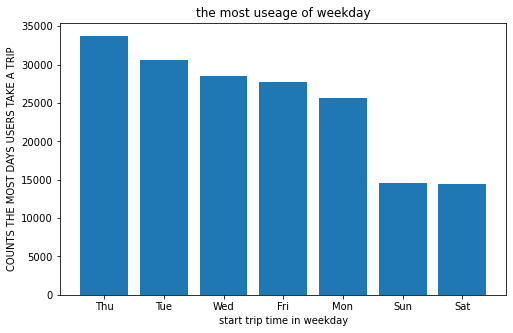

In [5]:
plt.figure(figsize=[8,5])
plt.bar(x = df.start_time_weekday.value_counts().keys(), height = df.start_time_weekday.value_counts() )
plt.title('the most useage of weekday')
plt.xlabel('start trip time in weekday')
plt.ylabel('COUNTS THE MOST DAYS USERS TAKE A TRIP')
plt.show()

## (User Types and Their weekday and hours Usage)

> Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm. Customers are usually use the system mainly on weekends to explore the Bay Area.

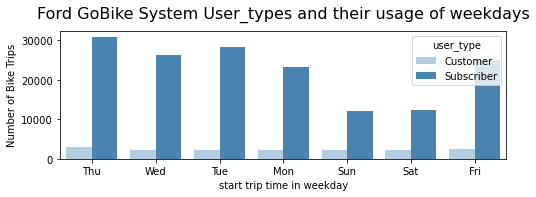

In [4]:
plt.figure(figsize = [8, 8])

# subplot 1
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'start_time_weekday', hue = 'user_type', palette = 'Blues')
plt.xlabel('start trip time in weekday')
plt.ylabel('Number of Bike Trips')
plt.title("Ford GoBike System User_types and their usage of weekdays", y=1.05, fontsize=16)
plt.show()

## (the trip duration per user_type and Gender)
>  In both cases, females take longer trips than males . The difference is the customers greater than the subscribers (the difference is quite small).


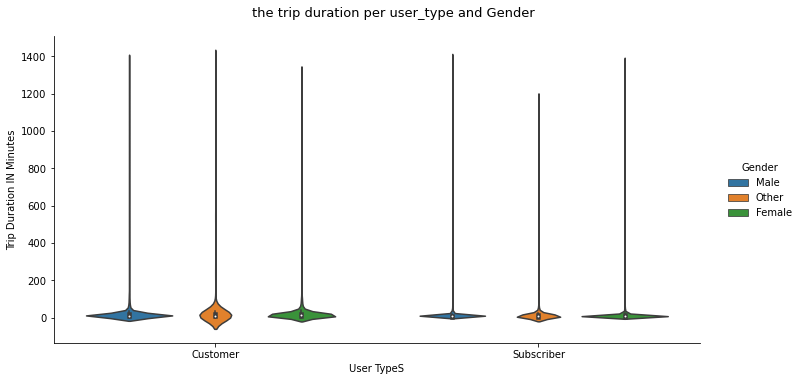

In [6]:
graph = sb.catplot(data=df, x='user_type', y="duration_minute", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User TypeS", "Trip Duration IN Minutes")
graph._legend.set_title('Gender')
graph.fig.suptitle('the trip duration per user_type and Gender', y=1.05, fontsize=13);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

### Summery
There are two types of clients using the system: Subscribers and Customers. Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm.
There was a lot of subscribers using the bike sharing system than casual customers overall.
where a large number of people can benefit from this program:
Environmentally friendly, budget friendly, and lifetsyle friendly.
Renting a bike from theFord GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in the city, both for enjoyment and work.

 